In [ ]:
pip install numpy scikit-image opencv-python pandas matplotlib


In [ ]:


!pip install scikit-image opencv-python pandas matplotlib tifffile
import numpy as np
import cv2
from skimage import measure
import pandas as pd
from tifffile import imread
from google.colab import files



In [ ]:
def analyze_bivouac(stack, shrink_step=2, min_inner_area=20):
    results = []

    for slice_idx in range(stack.shape[0]):
        img = stack[slice_idx]


        if img.dtype == np.float32:
            img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Preprocessing
        img = cv2.GaussianBlur(img, (5, 5), 0)
        _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

        # Largest component
        labels = measure.label(binary)
        if len(measure.regionprops(labels)) == 0:
            continue

        largest_cc = max(measure.regionprops(labels), key=lambda x: x.area)
        mask = (labels == largest_cc.label).astype(np.uint8) * 255

        # Bands
        distance = 0
        mask_copy = mask.copy()

        while True:
            distance += shrink_step
            eroded = cv2.erode(mask_copy, np.ones((3, 3), np.uint8), iterations=shrink_step)

            if np.sum(eroded) < min_inner_area:
                break

            donut = cv2.subtract(mask_copy, eroded)
            mean_val = np.mean(img[donut.astype(bool)])

            results.append({
                "Slice": slice_idx + 1,
                "Distance": distance,
                "BandArea": np.sum(donut),
                "BandMean": mean_val
            })
            mask_copy = eroded.copy()

    return pd.DataFrame(results)


uploaded = files.upload()
filename = list(uploaded.keys())[0]
stack = imread(filename)

print(f"Loaded stack: {stack.shape} | dtype: {stack.dtype}")

# Normalize
if stack.dtype != np.uint8:
    print("Normalizing to 8-bit...")
    stack = cv2.normalize(stack, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

results_df = analyze_bivouac(stack)
results_df.to_csv('results.csv', index=False)
files.download('results.csv')

KeyboardInterrupt: 

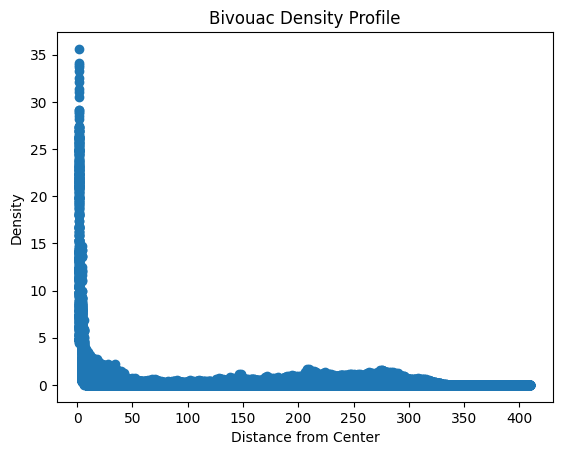

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(results_df["Distance"], results_df["BandMean"])
plt.xlabel("Distance from Center")
plt.ylabel("Density")
plt.title("Bivouac Density Profile")
plt.show()


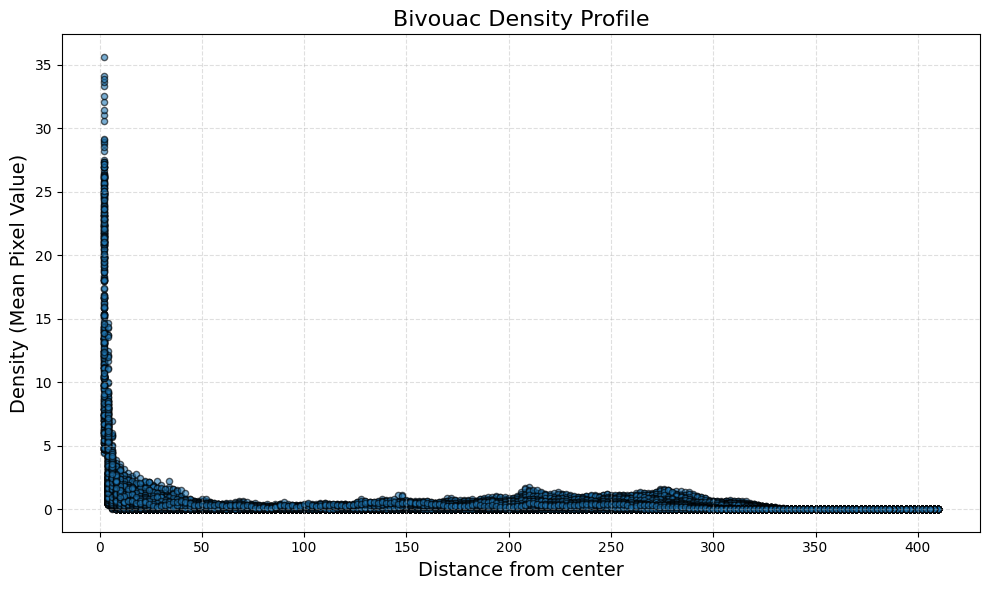

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    results_df["Distance"],
    results_df["BandMean"],
    s=20,
    alpha=0.6,
    edgecolor='k'
)

plt.xlabel("Distance from center", fontsize=14)
plt.ylabel("Density (Mean Pixel Value)", fontsize=14)
plt.title("Bivouac Density Profile", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import cv2
from skimage import measure
from imageio import imread
from google.colab import files

def analyze_bivouac(stack, shrink_step=2, min_inner_area=20):
    results = []

    for slice_idx in range(stack.shape[0]):
        raw_img = stack[slice_idx]


        if raw_img.dtype == np.float32:
            raw_img = cv2.normalize(raw_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


        blurred_img = cv2.GaussianBlur(raw_img, (5, 5), 0)
        _, binary = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

        # Find largest
        labels = measure.label(binary)
        if len(measure.regionprops(labels)) == 0:
            continue

        largest_cc = max(measure.regionprops(labels), key=lambda x: x.area)
        mask = (labels == largest_cc.label).astype(np.uint8) * 255

        # Analyze bands
        distance = 0
        mask_copy = mask.copy()

        while True:
            distance += shrink_step
            eroded = cv2.erode(mask_copy, np.ones((3, 3), np.uint8), iterations=shrink_step)

            if np.sum(eroded) < min_inner_area:
                break

            donut = cv2.subtract(mask_copy, eroded)
            mean_val = np.mean(raw_img[donut.astype(bool)])  # Use RAW image

            results.append({
                "Slice": slice_idx + 1,
                "Distance": distance,
                "BandArea": np.sum(donut),
                "BandMean": mean_val
            })
            mask_copy = eroded.copy()

    return pd.DataFrame(results)


uploaded = files.upload()
filename = list(uploaded.keys())[0]
stack = imread(filename)

print(f"Loaded stack: {stack.shape} | dtype: {stack.dtype}")


if stack.dtype != np.uint8:
    print("Normalizing to 8-bit...")
    stack = cv2.normalize(stack, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

results_df = analyze_bivouac(stack)
results_df.to_csv('results.csv', index=False)
files.download('results.csv')


Saving 20220412_00_Zettec5_fullcircle_plug_test_02.tif to 20220412_00_Zettec5_fullcircle_plug_test_02.tif


/tmp/ipython-input-1044981692.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  stack = imread(filename)


Loaded stack: (491, 821, 821) | dtype: float32
Normalizing to 8-bit...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving results (7).csv to results (7).csv


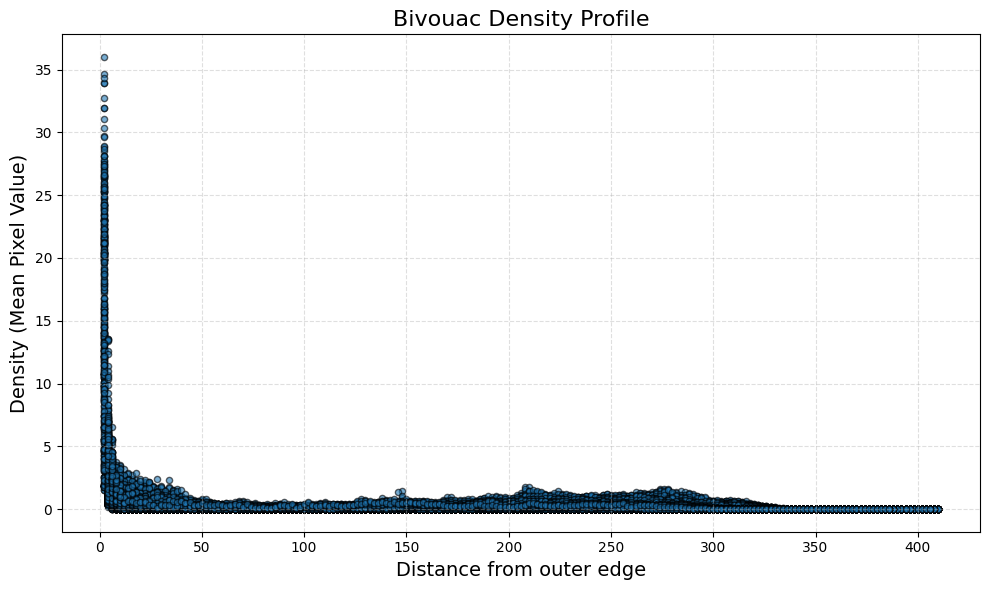

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
filename = list(uploaded.keys())[0]


results_df = pd.read_csv(filename)


plt.figure(figsize=(10, 6))
plt.scatter(
    results_df["Distance"],
    results_df["BandMean"],
    s=20,
    alpha=0.6,
    edgecolor='k'
)

plt.xlabel("Distance from outer edge", fontsize=14)
plt.ylabel("Density (Mean Pixel Value)", fontsize=14)
plt.title("Bivouac Density Profile", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Saving results (7).csv to results (7) (6).csv


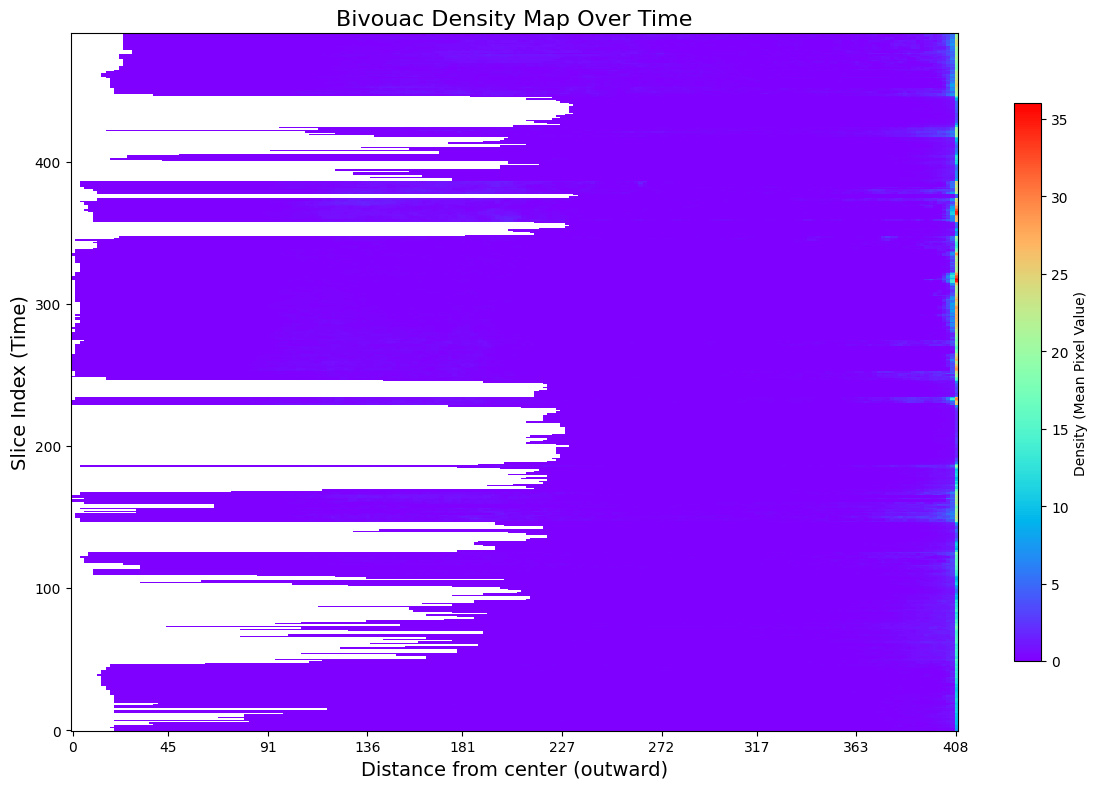

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
results_df = pd.read_csv(filename)


max_distance = results_df["Distance"].max()
results_df["DistanceFromCenter"] = max_distance - results_df["Distance"]


pivot_table = results_df.pivot(index="Slice", columns="DistanceFromCenter", values="BandMean")
pivot_table = pivot_table.sort_index(axis=0)
pivot_table = pivot_table.sort_index(axis=1)


pivot_array = pivot_table.to_numpy()


plt.figure(figsize=(12, 8))
plt.imshow(
    pivot_array,
    aspect='auto',
    cmap='rainbow',
    origin='lower',
    interpolation='nearest'
)

plt.colorbar(label='Density (Mean Pixel Value)', shrink=0.8)
plt.xlabel("Distance from center (outward)", fontsize=14)
plt.ylabel("Slice Index (Time)", fontsize=14)
plt.title("Bivouac Density Map Over Time", fontsize=16)

num_ticks = 10
tick_positions = np.linspace(0, pivot_array.shape[1] - 1, num_ticks, dtype=int)
tick_labels = np.round(np.linspace(pivot_table.columns.min(), pivot_table.columns.max(), num_ticks)).astype(int)

plt.xticks(ticks=tick_positions, labels=tick_labels)

plt.tight_layout()
plt.show()


Saving results (7).csv to results (7) (14).csv


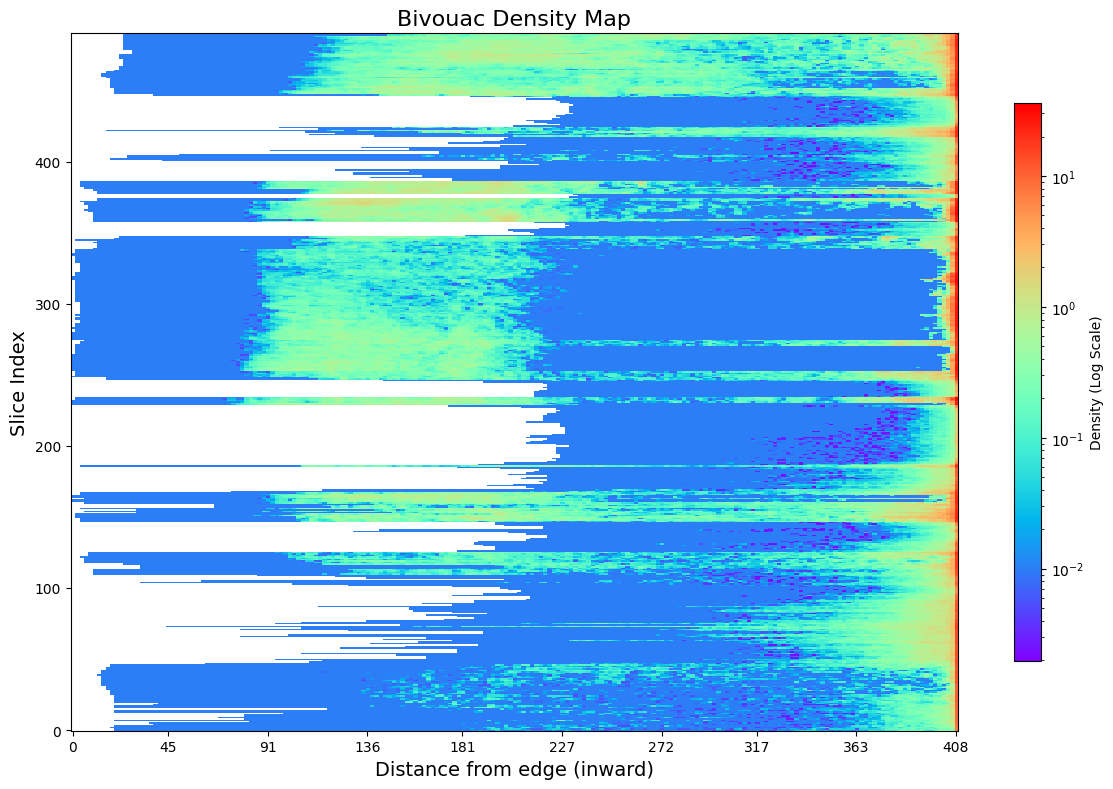

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from google.colab import files


uploaded = files.upload()
filename = list(uploaded.keys())[0]
results_df = pd.read_csv(filename)


max_distance = results_df["Distance"].max()
results_df["DistanceFromCenter"] = max_distance - results_df["Distance"]


pivot_table = results_df.pivot(index="Slice", columns="DistanceFromCenter", values="BandMean")
pivot_table = pivot_table.sort_index(axis=0)
pivot_table = pivot_table.sort_index(axis=1)


pivot_array = pivot_table.to_numpy()
pivot_array[pivot_array == 0] = 1e-2


plt.figure(figsize=(12, 8))
plt.imshow(
    pivot_array,
    aspect='auto',
    cmap='rainbow',
    origin='lower',
    interpolation='nearest',
    norm=LogNorm(vmin=np.nanmin(pivot_array), vmax=np.nanmax(pivot_array))
)

plt.colorbar(label='Density (Log Scale)', shrink=0.8)
plt.xlabel("Distance from edge (inward)", fontsize=14)
plt.ylabel("Slice Index", fontsize=14)
plt.title("Bivouac Density Map", fontsize=16)


num_ticks = 10
tick_positions = np.linspace(0, pivot_array.shape[1] - 1, num_ticks, dtype=int)
tick_labels = np.round(np.linspace(pivot_table.columns.min(), pivot_table.columns.max(), num_ticks)).astype(int)
plt.xticks(ticks=tick_positions, labels=tick_labels)

plt.tight_layout()
plt.show()
